# DIABETES PREDICTION

## Imports:

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
%matplotlib inline
sns.set()

## Load the Pima Indians Diabetes dataset:

In [191]:
#load the pima indian diabetes dataset
diabetes=pd.read_csv("E:\Machine_Learning\DataSets\diabetes.csv")


## Inspect the dataset:

In [196]:
print("diabetes shape is :",diabetes.shape)
print("Dataset Description:\n")
diabetes.describe()

diabetes shape is : (768, 9)
Dataset Description:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [198]:
# Visualise a table with the first rows of the dataset, to better understand the data format
print("Dataset head :\n")
diabetes.head()

Dataset head :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Visualize the dataset:

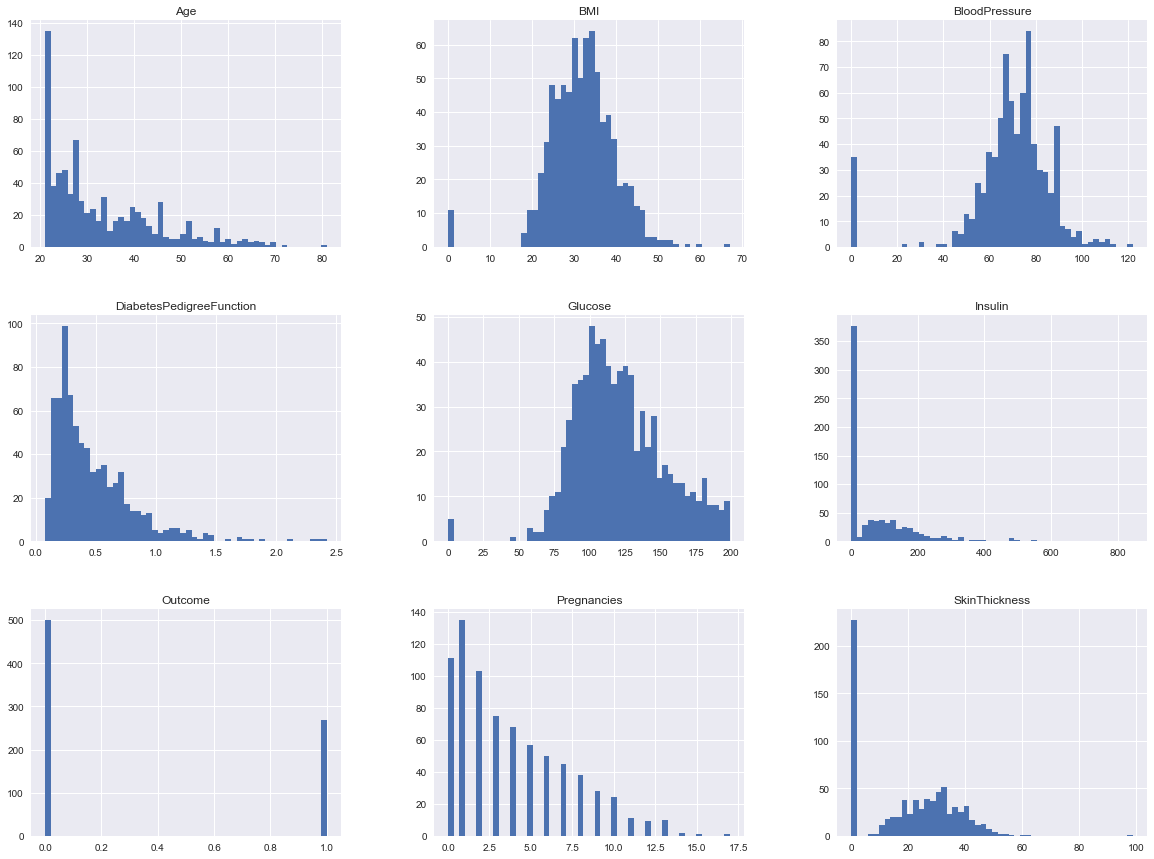

In [202]:
diabetes.hist(bins=50, figsize=(20, 15))
plt.show()

Outcome
0    500
1    268
dtype: int64


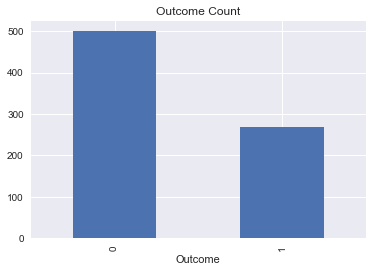

In [95]:
#print the Outcome counts 1/0
OutCount=diabetes.groupby("Outcome").size()
print(OutCount)
OutCount.plot(kind="bar",title="Outcome Count")

## Data correalation Matrix:

In [93]:
#Finding Correlation of attributes with outcome
corr_mat=diabetes.corr()

In [54]:
#correaltion matrix
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Visualize Predictors Correlation with Outcome:

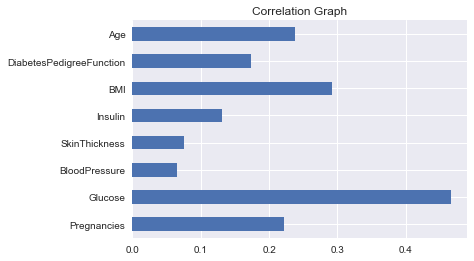

In [203]:
#plotting a graph for crrelation with Outcome
# here 8 is the index value of Outcome column
res=corr_mat.iloc[:-1,8]
res.plot(kind='barh',title="Correlation Graph")


#### From the above Correlation graph,It can be inferred that factors like "Age,BMI and BloodPressure" which can be measured without taking the blood sample ,ifluence the Outcome(0/1)

# Data Cleaning and Transformation:

#### There are some zero value records in the dataset.

In [80]:
zeros_Age=(diabetes["Age"]==0).sum()
zeros_BMI=(diabetes["BMI"]==0).sum()
zeros_BP=(diabetes["BloodPressure"]==0).sum()
print("Count of Zero values in Age : ",zeros_Age)
print("Count of Zero values in BMI : ",zeros_BMI)
print("Count of Zero values in BP : ",zeros_BP)

Count of Zero values in Age :  0
Count of Zero values in BMI :  11
Count of Zero values in BP :  35


#### Remove these records (zero value) from the dataset and create the required dataset for the model prediction.

## Creating Dataset for model:

In [86]:
#temp_ds contains all non zero records of the diabetes dataset
temp_ds=pd.DataFrame(diabetes[(diabetes["Age"]>0) & (diabetes["BMI"]>0) & (diabetes["BloodPressure"]>0)])
main_dataset=pd.DataFrame(data=temp_ds,columns=["Age","BMI","BloodPressure","Outcome"])
print("Original dataset dimesnions(diabetes): ",diabetes.shape)
print("Original dataset without zero value records dimensions(temp_ds): ",temp_ds.shape)
print("Dataset for Model without zero value records dimensions(main_dataset): ",main_dataset.shape)

Original dataset dimesnions(diabetes):  (768, 9)
Original dataset without zero value records dimensions(temp_ds):  (729, 9)
Dataset for Model without zero value records dimensions(main_dataset):  (729, 4)


In [105]:
main_dataset.describe()

,Age,BMI,BloodPressure,Outcome
count,729.000000,729.000000,729.000000,729.000000
mean,33.318244,32.469959,72.367627,0.344307
std,11.753078,6.885098,12.375838,0.475468
min,21.000000,18.200000,24.000000,0.000000
25%,24.000000,27.500000,64.000000,0.000000
50%,29.000000,32.400000,72.000000,0.000000
75%,41.000000,36.600000,80.000000,1.000000
max,81.000000,67.100000,122.000000,1.000000


#### main_dataset contains 729 non zero records.

Outcome
0    478
1    251
dtype: int64


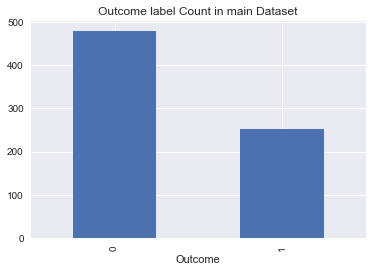

In [111]:
out_count=main_dataset.groupby("Outcome").size()
print(out_count)
out_count.plot(kind="bar",title="Outcome label Count in main Dataset")

# Splitting the Dataset:

In [115]:
#feature matrix
X=main_dataset.iloc[:,:-1]
X.head()
#X_train,X_test,y_train,y_test=train_test_split(main_dataset,random_state=66)

,Age,BMI,BloodPressure
0,50,33.6,72
1,31,26.6,66
2,32,23.3,64
3,21,28.1,66
4,33,43.1,40


In [116]:
#value vector
y=main_dataset["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [123]:
# Split the training dataset in 80% / 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60,stratify=y)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (583, 3)
y_train shape :  (583,)
X_test shape :  (146, 3)
y_test shape :  (146,)


## Feature Scaling:

In [147]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
print("type(X_train_scaled) : ",type(X_train_scaled))
print("type(X_test_scaled) : ",type(X_test_scaled))

type(X_train_scaled) :  <class 'numpy.ndarray'>
type(X_test_scaled) :  <class 'numpy.ndarray'>


### Scaled Values:

In [148]:
#create a pandas dataframe to display the scaled values
sv=pd.DataFrame(data=X_train_scaled)
sv.head()

,0,1,2
0,0.200000,0.509202,0.163265
1,0.050000,0.259714,0.306122
2,0.483333,0.204499,0.591837
3,0.000000,0.089980,0.387755
4,0.233333,0.374233,0.673469


# Training the SVM model:

In [150]:
#create instance for SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Check Accuracy:

In [158]:
# use score of SVC() to find Accuracy
train_accuracy=svc.score(X_train_scaled,y_train)
test_accuracy=svc.score(X_test_scaled,y_test)
print("Accuracy on training set: ",train_accuracy)
print("Accuracy on testing set: ",test_accuracy)

Accuracy on training set:  0.6638078902229846
Accuracy on testing set:  0.5958904109589042


## Model Tuning:

### Find the best Parameters for SVC.

In [157]:
param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 50.0], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'shrinking': [True, False], 'gamma': ['auto', 1, 0.1], 'coef0': [0.0, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

#### Print the best score found by GridSearchCV:

In [162]:
best_score=grid_search.best_score_
print("Best score = ",best_score)

Best score =  0.7066895368782161


#### Apply the Parameters to the Model and train it:

In [165]:
# Create an instance of the SVC algorithm using parameters
# from best_estimator_ property
best_svc = grid_search.best_estimator_
#train the model
best_svc.fit(X_train_scaled,y_train)

<class 'sklearn.svm.classes.SVC'>


SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Check Accuracy:

In [167]:
# use score of SVC() to find Accuracy
best_train_accuracy=best_svc.score(X_train_scaled,y_train)
best_test_accuracy=best_svc.score(X_test_scaled,y_test)
print("Best Accuracy on training set: ",best_train_accuracy)
print("Best Accuracy on testing set: ",best_test_accuracy)

Best Accuracy on training set:  0.7186963979416809
Best Accuracy on testing set:  0.6438356164383562


## Make a Prediction:

In [169]:
# create a new (fake) person by taking the values of Age,BMI and BloodPressure
new_person = pd.DataFrame([[50,33.6,72]])
# Scale those values like the others using MinMaxScaler
new_person_scaled = scaler.transform(new_person)

In [177]:
#predict the outcome
#here "1" means "person is likely to have type-2 diabetes"
# 0 means "person doesn't have type-2 diabetes
prediction = best_svc.predict(new_person_scaled)
type(prediction)

numpy.ndarray

In [176]:
print("Prediction value : ",prediction[0])

Prediction value :  1


In [178]:
if(prediction==1):
    print("You are likely to have type-2 diabetes.")
else:
    print("Congratulations, You don't have type-2 diabetes.")


You are likely to have type-2 diabetes.


### Taking the input from user:

In [179]:
age = (int)input("Ager : ")
BMI = (float)input("BMI : ")
BP = (int)input("Blood Pressure : ")
pred = input("Enter Y to predict : ")

Ager : 25
BMI : 125
Blood Pressure : 126
Enter Y to predict : Y


In [187]:
person = pd.DataFrame([[age,BMI,BP]])
person_scaled = scaler.transform(person)

In [190]:
if(pred == "Y" or pred == "y"):
    P_prediction = best_svc.predict(person_scaled)
    if(P_prediction==1):
        print("You are likely to have type-2 diabetes.")
    else:
        print("Congratulations, You don't have type-2 diabetes.")
else:
    print("You did not entered Y or y ")

You are likely to have type-2 diabetes.
